In [ ]:
!pip install fbprophet

In [ ]:
!pip install pystan

In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')

In [ ]:
df['Year'] = df['date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['date'].apply(lambda x: str(x)[-7:-5])
df['Day'] = df['date'].apply(lambda x: str(x)[:-8])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [ ]:
df = df.loc[(df['location']=='India')]
df.drop(df.columns.difference(['date','total_cases','stringency_index','new_cases']), axis = 1, inplace =True) 
df.columns = ['ds','y','stringency_index','new_cases']
df.head(10)

,ds,y,stringency_index,new_cases
38181,30-01-2020,1.0,1.0,10.19
38182,31-01-2020,1.0,0.0,10.19
38183,01-02-2020,1.0,0.0,10.19
38184,02-02-2020,2.0,1.0,10.19
38185,03-02-2020,3.0,1.0,10.19
38186,04-02-2020,3.0,0.0,10.19
38187,05-02-2020,3.0,0.0,10.19
38188,06-02-2020,3.0,0.0,10.19
38189,07-02-2020,3.0,0.0,10.19
38190,08-02-2020,3.0,0.0,10.19


In [ ]:
print(type('y'))

<class 'str'>


In [ ]:
m = Prophet(interval_width=0.95, yearly_seasonality=True)
model = m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,-3.057382e+06,-5.407645e+06,7.916272e+06,-3.057382e+06,-3.057382e+06,4.235620e+06,4.235620e+06,4.235620e+06,-126825.582264,-126825.582264,-126825.582264,4.362445e+06,4.362445e+06,4.362445e+06,0.0,0.0,0.0,1.178237e+06
1,2020-01-03,-3.024356e+06,-5.320592e+06,7.971204e+06,-3.024356e+06,-3.024356e+06,4.586471e+06,4.586471e+06,4.586471e+06,166942.056493,166942.056493,166942.056493,4.419529e+06,4.419529e+06,4.419529e+06,0.0,0.0,0.0,1.562115e+06
2,2020-01-04,-2.991329e+06,-5.777678e+06,8.688127e+06,-2.991329e+06,-2.991329e+06,4.416210e+06,4.416210e+06,4.416210e+06,-3115.224344,-3115.224344,-3115.224344,4.419325e+06,4.419325e+06,4.419325e+06,0.0,0.0,0.0,1.424881e+06
3,2020-01-05,-2.958302e+06,-5.443817e+06,8.738242e+06,-2.958302e+06,-2.958302e+06,4.631086e+06,4.631086e+06,4.631086e+06,266191.047815,266191.047815,266191.047815,4.364895e+06,4.364895e+06,4.364895e+06,0.0,0.0,0.0,1.672784e+06
4,2020-01-06,-2.925276e+06,-5.754075e+06,7.950451e+06,-2.925276e+06,-2.925276e+06,4.199612e+06,4.199612e+06,4.199612e+06,-60849.416594,-60849.416594,-60849.416594,4.260462e+06,4.260462e+06,4.260462e+06,0.0,0.0,0.0,1.274336e+06


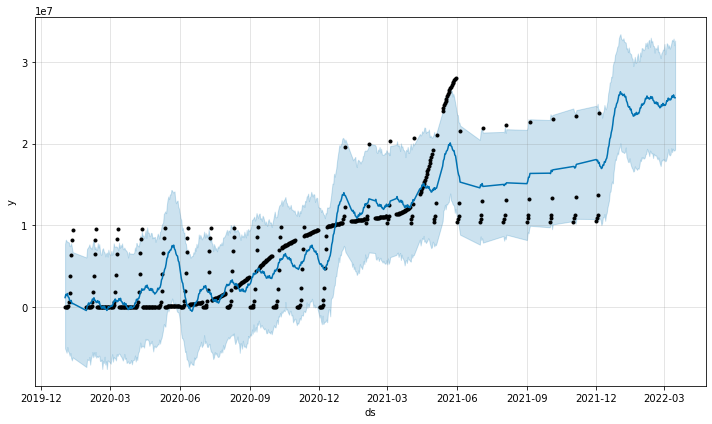

In [ ]:
plot1 = m.plot(forecast)

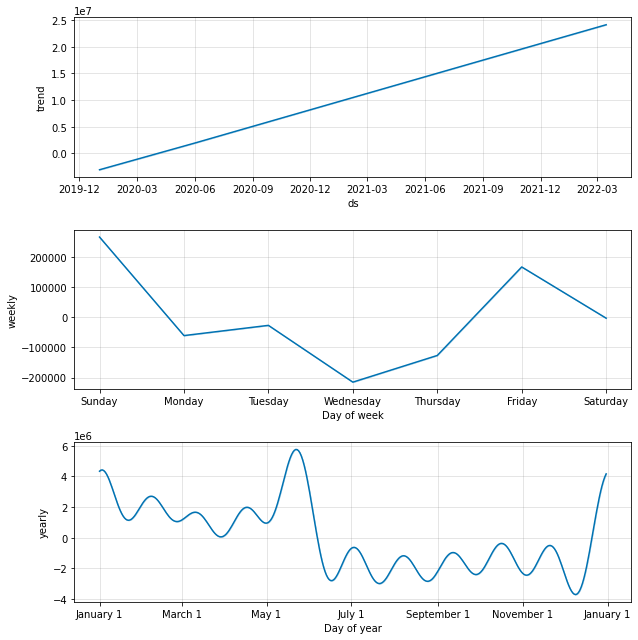

In [ ]:
plt2 = m.plot_components(forecast)